# Heart Disease Prediction Using various Machine Learning Models 

- World Health Organization has estimated that four out of five cardiovascular disease (CVD) deaths are due to heart attacks. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.


- The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

- Variables

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

- Demographic:

• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

- Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

- Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



In [14]:
# importing necessary lbraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import colormaps
import scipy.optimize as opt
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.mlab as mlab
import pylab as pl



In [15]:
# reading the dataset

disease_df = pd.read_csv(r'C:\Users\HP\Desktop\cardiovascular prediction\framingham.csv')
disease_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [16]:
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [18]:
# checking the null values 

disease_df.isnull().sum().sum()

645

In [19]:
# Dropping the education column 

disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [20]:
disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

# Splitting the Dataset into Test and Train Sets

In [22]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2624, 6) (2624,)
Test set: (1125, 6) (1125,)


# Exploratory Data Analysis of Heart Disease Dataset

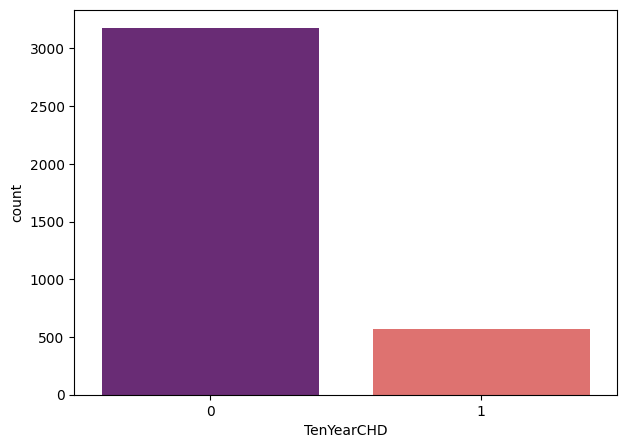

In [25]:
# counting no. of patients affected with CHD

plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,palette="magma")
plt.show()

Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)

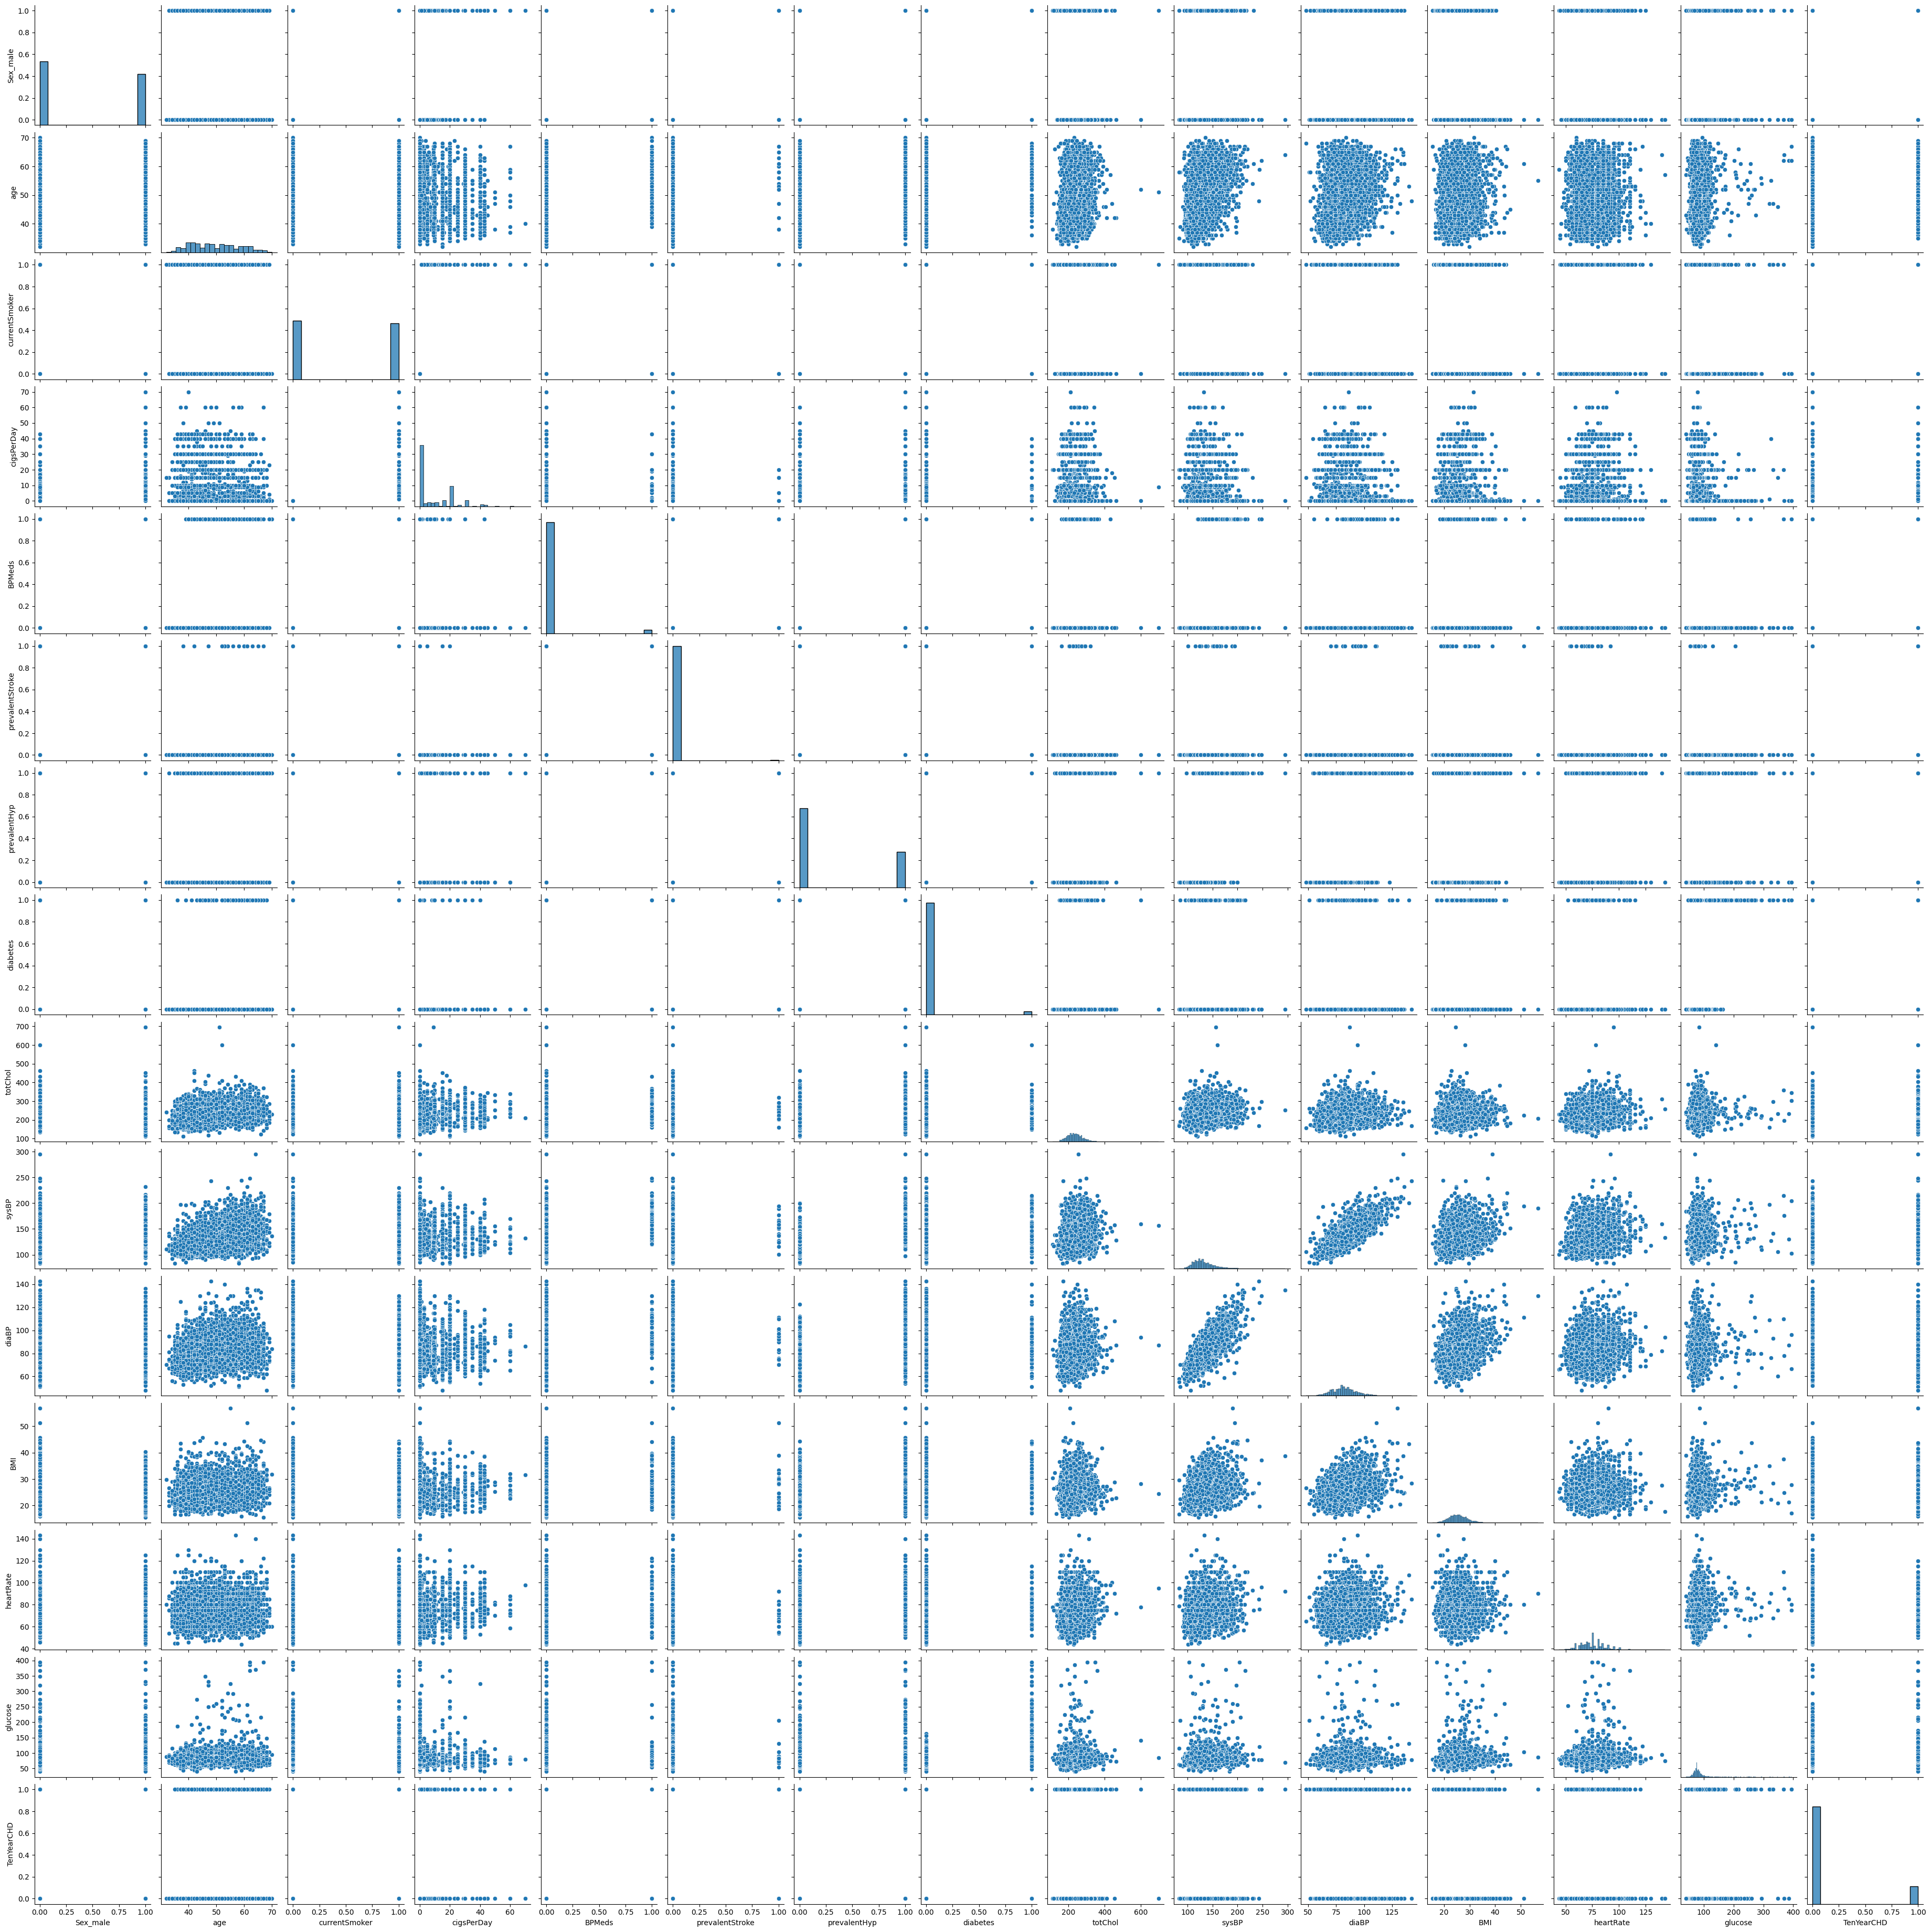

In [37]:
# Explore the distribution of numerical features
sns.pairplot(disease_df)
plt.show()

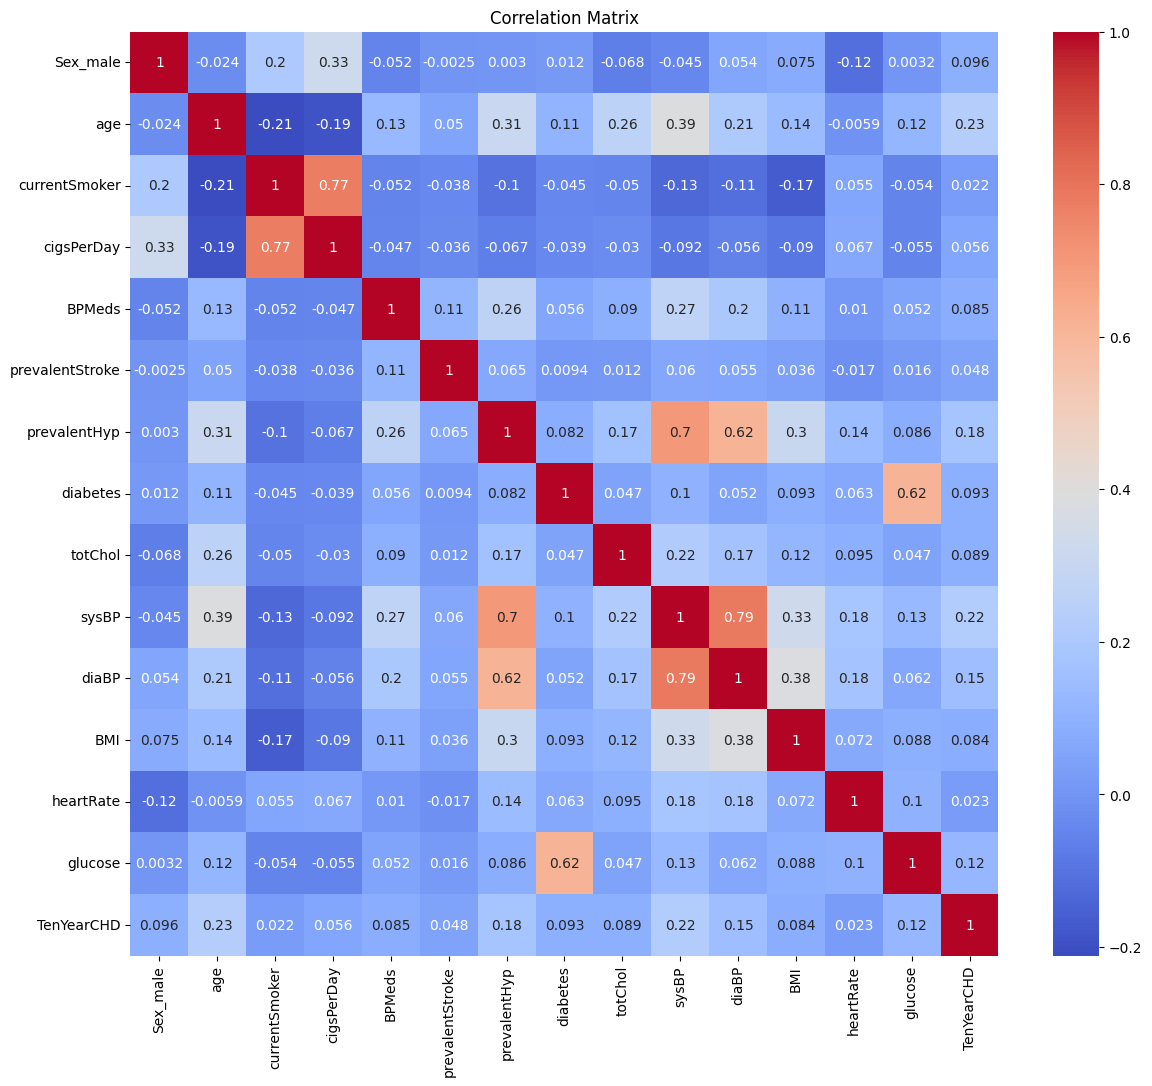

In [39]:
# Explore correlations between features
plt.figure(figsize=(14,12))
corr_matrix = disease_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

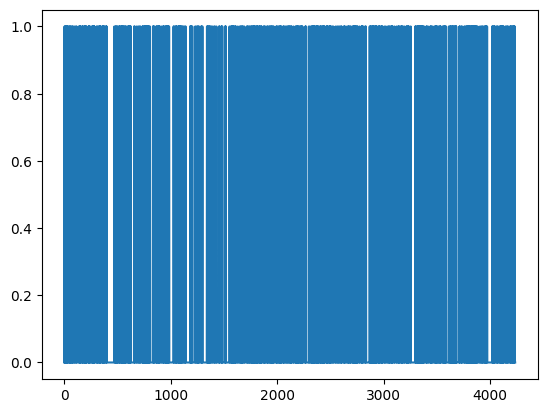

In [26]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

# Fitting Logistic Regression Model for Heart Disease Prediction

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluating Logistic Regression Model

In [28]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8488888888888889


# Confusion Matrix

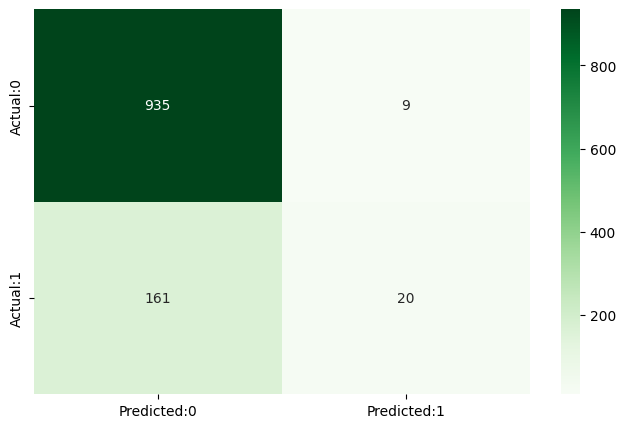

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       944
           1       0.69      0.11      0.19       181

    accuracy                           0.85      1125
   macro avg       0.77      0.55      0.55      1125
weighted avg       0.83      0.85      0.80      1125



In [32]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

The model achieved an overall accuracy of approximately 84.89%. This indicates the proportion of correctly classified instances out of the total number of instances.

However, when examining the details of the confusion matrix, it becomes evident that the model's performance varies across different classes. For class 0 (considered negative), the model demonstrates strong precision (85%) and recall (99%), resulting in a high F1-score (92%). This suggests that the model effectively identifies instances belonging to class 0, with few false positives and a high proportion of true positives.

Conversely, for class 1 (considered positive), the model's precision is notably lower at 69%, indicating a higher rate of false positives. The recall for class 1 is also low at 11%, indicating a high rate of false negatives. Consequently, the F1-score for class 1 is considerably lower at 19%. This implies that the model struggles to accurately classify instances belonging to class 1, resulting in a higher number of misclassifications.

In summary, while the model demonstrates strong performance in classifying instances belonging to class 0, its performance is considerably poorer for class 1. This discrepancy may be attributed to class imbalance or the model's inherent limitations in distinguishing instances belonging to class 1. 

# Model Building 

Lets find out the accuarcy of the model in different models 

In [45]:
# Split the data into features (X) and target variable (y)
X = disease_df.drop('TenYearCHD', axis=1)
y = disease_df['TenYearCHD']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Handle missing values (if any)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [50]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}    

In [64]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       630
           1       0.62      0.07      0.12       120

    accuracy                           0.84       750
   macro avg       0.73      0.53      0.52       750
weighted avg       0.81      0.84      0.79       750

Training Decision Tree...
Decision Tree Accuracy: 0.77


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       630
           1       0.25      0.23      0.24       120

    accuracy                           0.77       750
   macro avg       0.55      0.55      0.55       750
weighted avg       0.76      0.77      0.76       750

Training Random Forest...
Random Forest Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       630
           1       0.36      0.03      0.06       120

    accuracy                           0.84       750
   macro avg       0.60      0.51      0.49       750
weighted avg       0.77      0.84      0.77       750

Training SVM...
SVM Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       630
           1       0.25      0.01      0.02       120

    accuracy                           0.84       750
   macro avg       0.55      0.50     

In [63]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("\n")

Training Logistic Regression...
Logistic Regression Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       630
           1       0.62      0.07      0.12       120

    accuracy                           0.84       750
   macro avg       0.73      0.53      0.52       750
weighted avg       0.81      0.84      0.79       750



Training Decision Tree...
Decision Tree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       630
           1       0.24      0.24      0.24       120

    accuracy                           0.75       750
   macro avg       0.55      0.55      0.55       750
weighted avg       0.76      0.75      0.75       750



Training Random Forest...
Random Forest Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      1.00      0.91       630
           1       0.62      0.04      0.08       120

 

# Model Accuracy

In [65]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.84
Decision Tree Accuracy: 0.75
Random Forest Accuracy: 0.84
SVM Accuracy: 0.84
KNN Accuracy: 0.83
Gradient Boosting Accuracy: 0.84
XGBoost Accuracy: 0.83


# Model Comparison

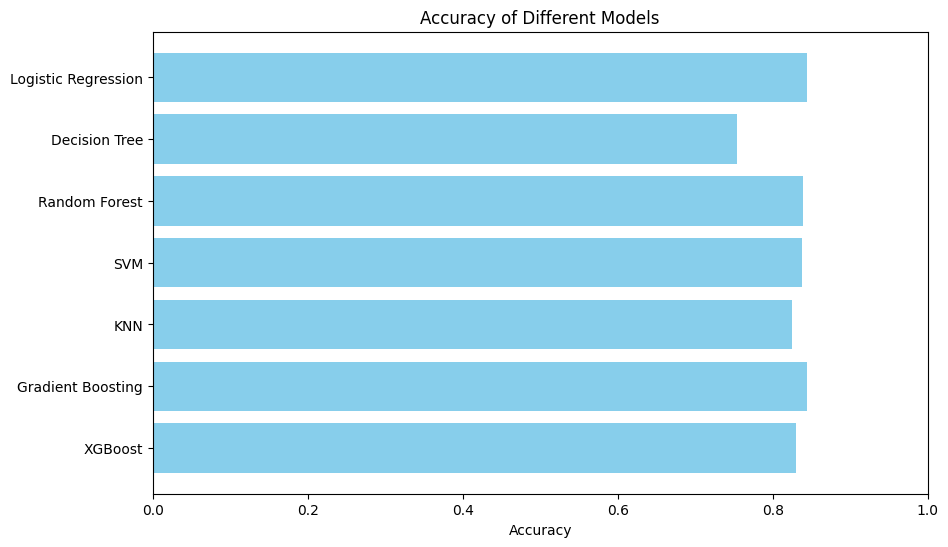

In [66]:
# # Dictionary to store accuracies

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

Here we have compared the accuracy of different machine learning models. As from the chart it is clear that the Logitic regeression and Random forest models are highly accurate.